## Problem Statement 1

In [1]:
# Write Load the "Country-data.csv" dataset into a DataFrame and perform the followingtasks

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [3]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Create a seperateDataFrame with only numeric data by remove the "country"column

new_df = df.drop("country", axis = 1)
new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Scale the data using the Standard Scaler to create a scaled DataFrame

from sklearn.preprocessing import StandardScaler

names = ["child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]

new_df = pd.DataFrame(StandardScaler().fit_transform(new_df), columns = names)
new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


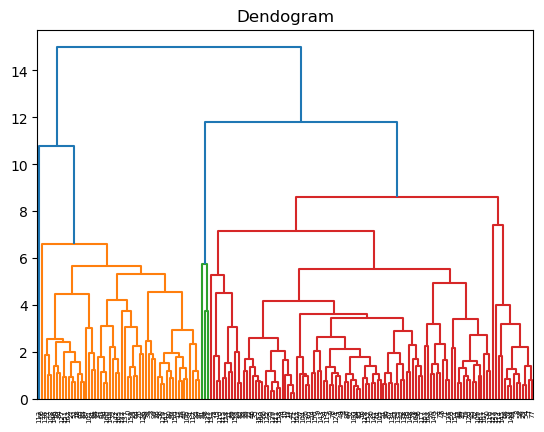

In [6]:
# Plotting dendograms with the complete linkage method

plt.title("Dendogram")
dend = sch.dendrogram(sch.linkage(new_df, method='complete'))

In [7]:
# Creating cluster labels using cut tree

Z = sch.linkage(new_df, method="complete")
cluster = pd.DataFrame(sch.cut_tree(Z, n_clusters=4), columns=["Hierarchical_Cluster_labels"])

final_df = pd.concat([new_df, cluster], axis = 1)
final_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_Cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


In [8]:
# Perform the 4-Component PCA on DataFrame

X = final_df.iloc[:, :-1]
y = final_df["Hierarchical_Cluster_labels"]

pca = PCA(n_components = 4)
PC = pca.fit_transform(X)

PCDF = pd.DataFrame(data = PC, columns = ["PC1", "PC2", "PC3", "PC4"])

final_PCDF = pd.concat([PCDF, cluster], axis = 1)
final_PCDF.head()

,PC1,PC2,PC3,PC4,Hierarchical_Cluster_labels
0,-2.913025,0.095621,-0.718118,1.005255,0
1,0.429911,-0.588156,-0.333486,-1.161059,1
2,-0.285225,-0.455174,1.221505,-0.868115,1
3,-2.932423,1.695555,1.525044,0.839625,0
4,1.033576,0.136659,-0.225721,-0.847063,1


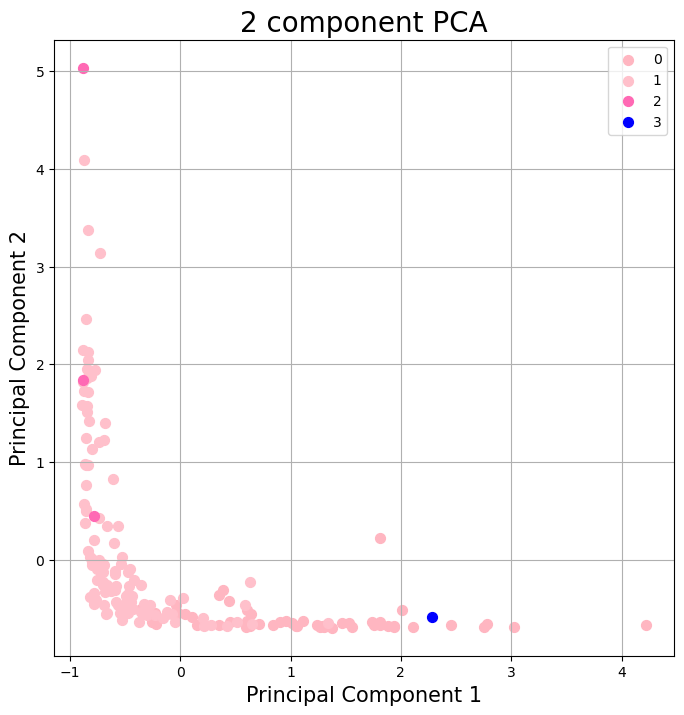

In [9]:
# Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3]
colors = ['lightpink', 'pink', 'hotpink', 'blue']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['Hierarchical_Cluster_labels'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'child_mort']
               , final_df.loc[indicesToKeep, 'gdpp']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Problem Statement 2

In [10]:
# Write a Python program that reads the “Credit Card Customer Data.csv”(provided on LMS)
# The following are the tasks that need to be taken into consideration while constructing the solution
# to Segregate customers based on the data provided with the help of k-means clustering

In [11]:
# Load the Given CSV file into a DataFrame

CData = pd.read_csv("Credit_Card_Customer_Data.csv")
CData.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [12]:
# Find missing values and drop the unnecessary columns

print(CData.isnull().sum())
CData = CData.drop("Sl_No", axis = 1)
CData = CData.drop("Customer Key", axis = 1)
CData.head()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


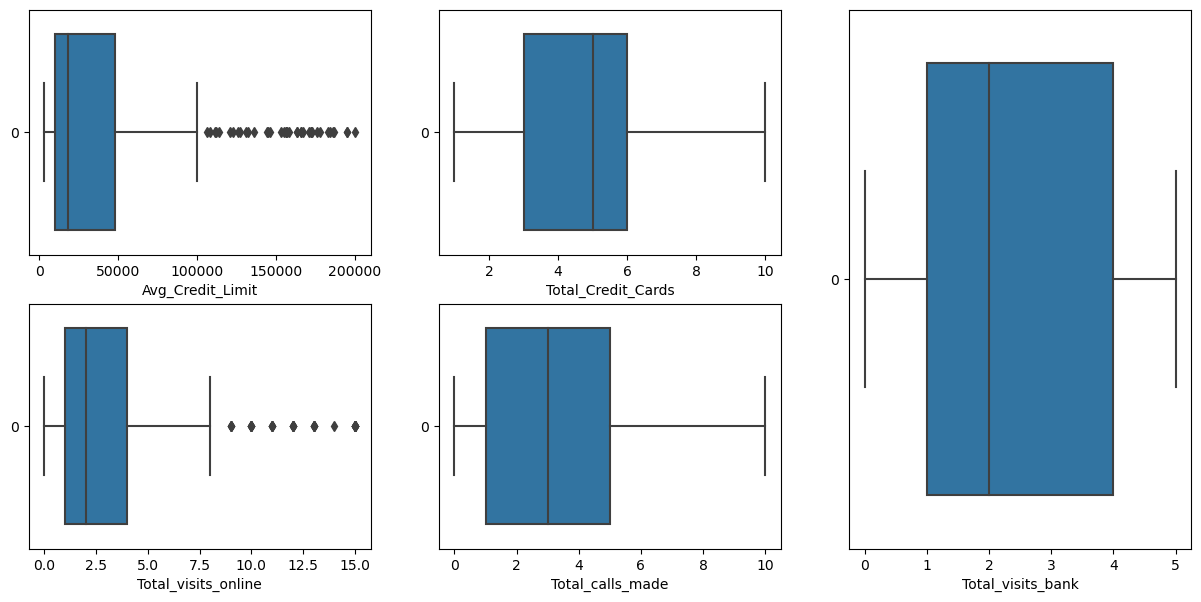

<AxesSubplot:>

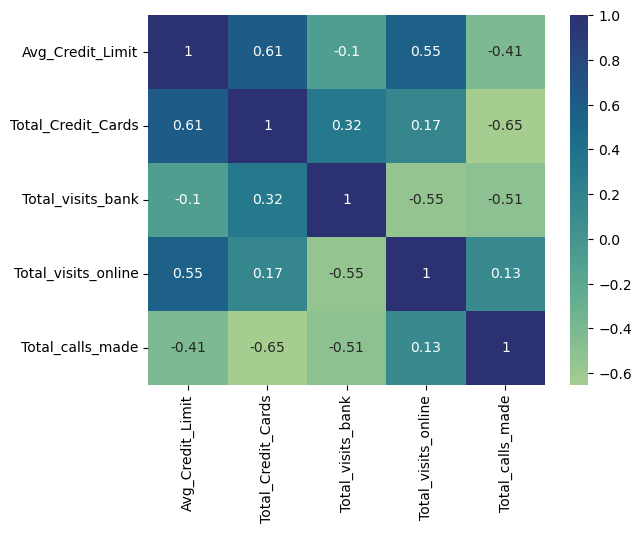

In [13]:
# Univariate and bivariate analysis
import seaborn as sns

plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
sns.boxplot(CData["Avg_Credit_Limit"], orient = "h")
plt.xlabel("Avg_Credit_Limit")

plt.subplot(2, 3, 2)
sns.boxplot(CData["Total_Credit_Cards"], orient= "h")
plt.xlabel("Total_Credit_Cards")

plt.subplot(1, 3, 3)
sns.boxplot(CData["Total_visits_bank"], orient= "h")
plt.xlabel("Total_visits_bank")

plt.subplot(2, 3, 4)
sns.boxplot(CData["Total_visits_online"], orient= "h")
plt.xlabel("Total_visits_online")

plt.subplot(2, 3, 5)
sns.boxplot(CData["Total_calls_made"], orient= "h")
plt.xlabel("Total_calls_made")

plt.show()

sns.heatmap(CData.corr(), annot = True, cmap="crest")

In [14]:
# Standardize the whole dataset

new_cdata = pd.DataFrame(StandardScaler().fit_transform(CData), columns=["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"])
new_cdata.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


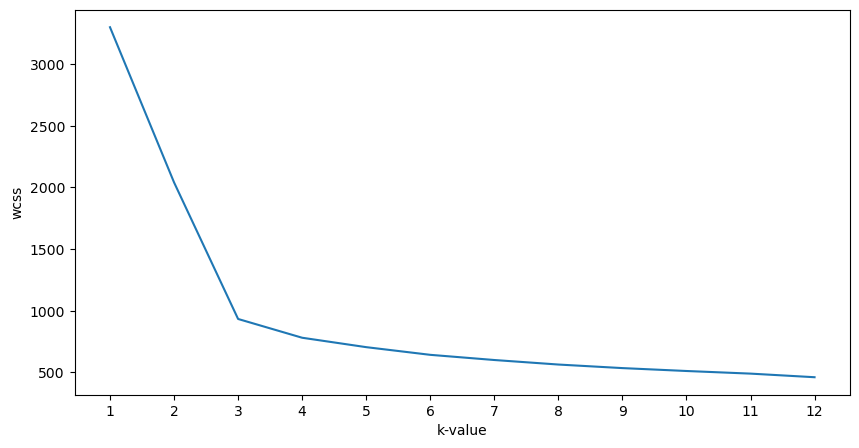

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


In [15]:
# Plot the score for different sizes of K and choose the best size for the cluster and build the final model
from sklearn.cluster import KMeans

inertia_list = []
for num_clusters in range(1, 13):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(new_cdata)
    inertia_list.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,13), inertia_list)
plt.xticks(range(1,13))
plt.xlabel("k-value")
plt.ylabel("wcss")
plt.show()

kmeans = KMeans(n_clusters=3)
kmeans.fit(new_cdata)
labels = pd.DataFrame(kmeans.predict(new_cdata), columns=["labels"])
ncdata = pd.concat([new_cdata, labels], axis = 1)
ncdata

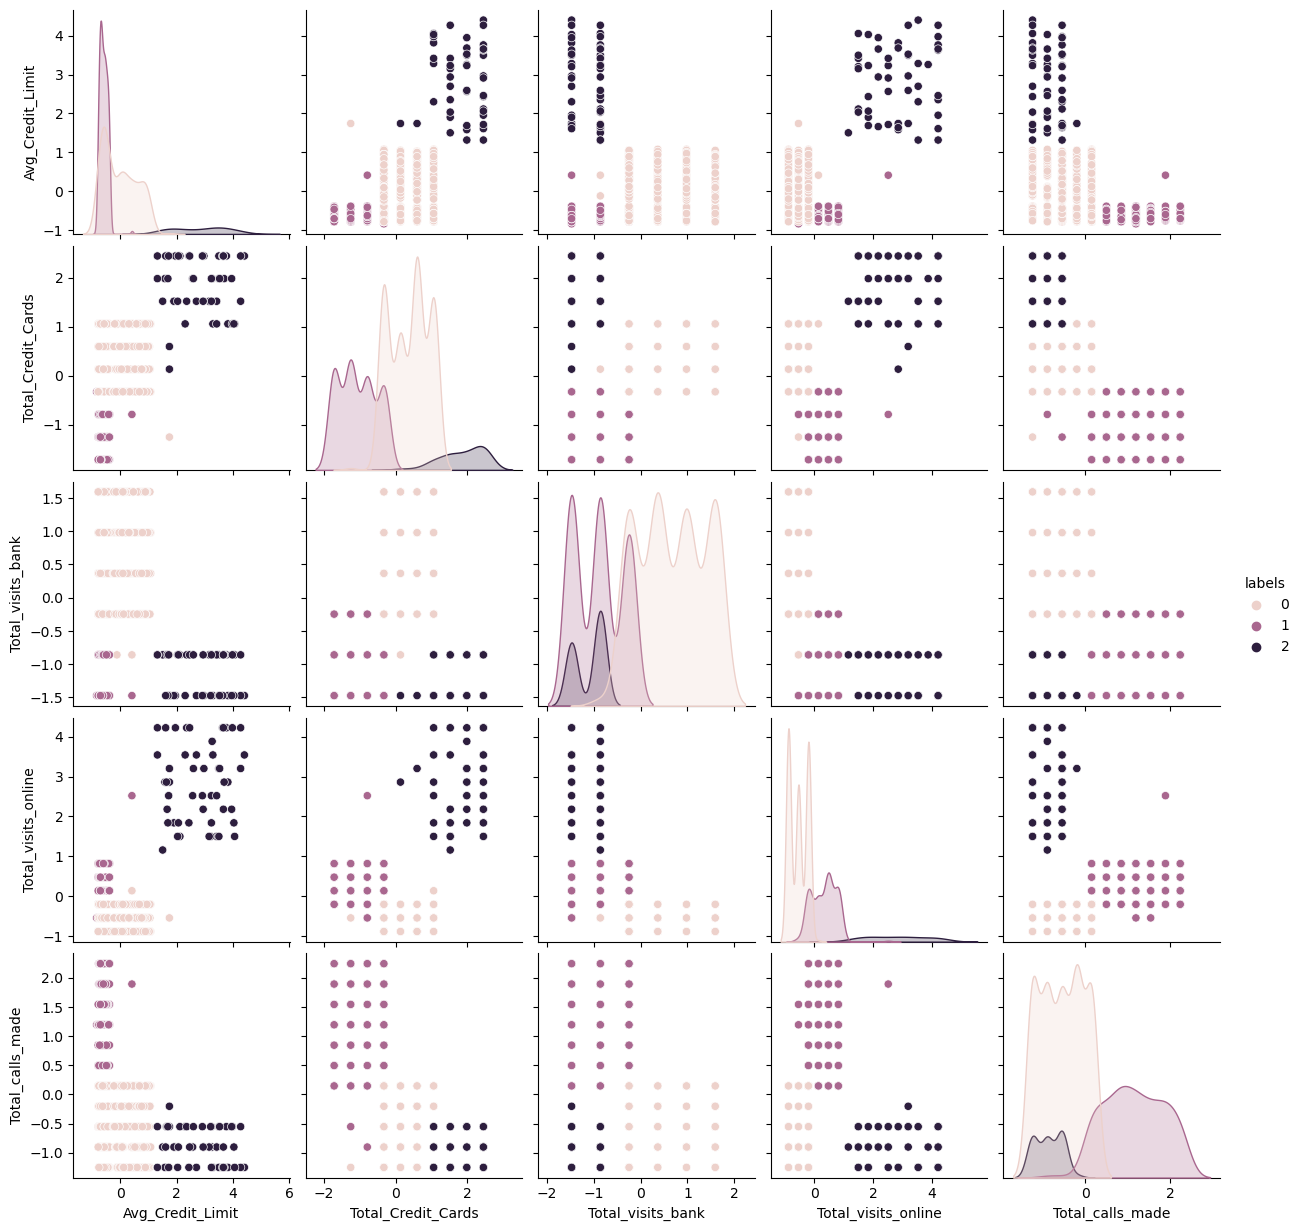

In [16]:
# Observe Cluster behavior with different columns

sns.pairplot(ncdata, hue="labels")

In [17]:
# Print Co-ordinates of all centroids and silhouette scores for the final model

from sklearn.metrics import silhouette_score

centroids = kmeans.cluster_centers_
print(centroids, end = "\n\n")

kscore = silhouette_score(ncdata, kmeans.labels_, metric="euclidean")
print(kscore)

[[-0.02106178  0.37368962  0.6663945  -0.55367163 -0.55300488]
 [-0.59579625 -1.05962278 -0.9015185   0.32299678  1.14810882]
 [ 2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]]

0.5411228112448502


## Problem Statement 3

In [18]:
# Load the "Mall_Customers.csv" dataset into a DataFrame to perform the following tasks

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

In [20]:
mall = pd.read_csv("Mall_Customers.csv")
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
# Find the correlation among the all the columns and drop the column/s with the least correlation

mall.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [22]:
mall = mall.drop("Age", axis = 1)
mall.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,Male,15,39
1,2,Male,15,81
2,3,Female,16,6
3,4,Female,16,77
4,5,Female,17,40


In [23]:
# Encode the "Gender" column using get_dummies() function

mall = pd.get_dummies(mall, columns=["Gender"])
mall.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,15,39,0,1
1,2,15,81,0,1
2,3,16,6,1,0
3,4,16,77,1,0
4,5,17,40,1,0


In [24]:
# Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4

dbscan = DBSCAN(eps=12.5, min_samples=4).fit(mall)
dbscan_data = mall.copy()
dbscan_data.loc[:, "Cluster"] = dbscan.labels_

In [25]:
# Print the size of each cluster and also the size of outliers' cluster

dbscan_data["Cluster"].value_counts().to_frame()

# -1 values represents the outliers

,Cluster
1,104
3,33
-1,21
5,14
0,12
4,11
2,5


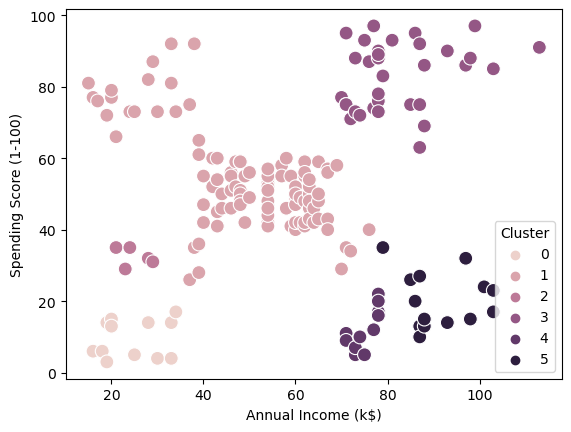

In [26]:
# Using a scatter plot shows how annual income corresponds to the spending rates of customers

sns.scatterplot(data = dbscan_data[dbscan_data["Cluster"] != -1], x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", s = 100)

plt.show()

## Problem Statement 4

In [27]:
# Write a Python program that reads the Groceries data.csv (provided on LMS) file into a DataFrame
# The following are the tasks that need to be taken into consideration while constructing the solution to using the 
# apriori algorithm and list out items that are sold most frequently with other items.

In [28]:
# Install mlxtend library for further process

!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [29]:
# Load the Groceries data.csv data into a Data frame

groceries = pd.read_csv("Groceries data.csv")
groceries.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [30]:
# Print customer data where the member number is 1001

print(groceries[groceries["Member_number"] == 1001])

       Member_number        Date     itemDescription  year  month  day  \
364             1001  2015-01-20         frankfurter  2015      1   20   
5695            1001  2015-02-05         frankfurter  2015      2    5   
6612            1001  2015-04-14                beef  2015      4   14   
9391            1001  2014-07-02             sausage  2014      7    2   
11046           1001  2014-12-12          whole milk  2014     12   12   
16513           1001  2015-01-20                soda  2015      1   20   
21844           1001  2015-02-05                curd  2015      2    5   
22761           1001  2015-04-14         white bread  2015      4   14   
25540           1001  2014-07-02          whole milk  2014      7    2   
27195           1001  2014-12-12                soda  2014     12   12   
32575           1001  2015-01-20  whipped/sour cream  2015      1   20   
32727           1001  2014-07-02          rolls/buns  2014      7    2   

       day_of_week  
364             

In [31]:
# Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)

groceries.loc[:, "item count"] = 1
groceries.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,item count
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1
1,2552,2015-05-01,whole milk,2015,5,1,4,1
2,2300,2015-09-19,pip fruit,2015,9,19,5,1
3,1187,2015-12-12,other vegetables,2015,12,12,5,1
4,3037,2015-01-02,whole milk,2015,1,2,4,1


In [32]:
# Drop unnecessary columns like "month","day","year","day_of_week"

groceries = groceries.drop(["month", "day", "year", "day_of_week"], axis = 1)
groceries.head()

,Member_number,Date,itemDescription,item count
0,1808,2015-07-21,tropical fruit,1
1,2552,2015-05-01,whole milk,1
2,2300,2015-09-19,pip fruit,1
3,1187,2015-12-12,other vegetables,1
4,3037,2015-01-02,whole milk,1


In [33]:
# Create a new data frame where all data is a group by member id and items they bought and set their value as item count

newG = (groceries
          .groupby(["Member_number", "itemDescription"])["item count"]
          .sum()
          .unstack()
          .reset_index()
          .fillna(0)
          .set_index("Member_number"))
newG

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
def encode_units(x):
    if x <= 0:
        return 0    
    if x >= 1:
        return 1
newG_sets = newG.applymap(encode_units)
newG_sets.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
# Use the Apriori algorithm and generate frequent itemsets that have the support of at least 7%

from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(newG_sets, min_support=0.07, use_colnames=True)

C:\Users\maxst\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [36]:
# Generating the rules with their corresponding support, confidence, and lift

from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
1,(whole milk),(bottled beer),0.458184,0.158799,0.085428,0.186450,1.174124,0.012669,1.033988
2,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969
3,(other vegetables),(bottled water),0.376603,0.213699,0.093894,0.249319,1.166680,0.013414,1.047450
4,(rolls/buns),(bottled water),0.349666,0.213699,0.079271,0.226706,1.060863,0.004548,1.016820


In [37]:
# Filtering out the values with lift > = 1 and confidence > = 0.5

rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
8,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
11,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795
19,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766
21,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775
39,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
43,(pastry),(whole milk),0.177527,0.458184,0.091072,0.513006,1.119651,0.009732,1.112572
44,(pip fruit),(whole milk),0.170600,0.458184,0.086968,0.509774,1.112598,0.008801,1.105239
54,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
66,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146
